<a href="https://colab.research.google.com/github/hissain/mlworks/blob/main/codes/Convolutional_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchvision torchdata

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
# Define the autoencoder architecture
class Autoencoder(nn.Module):
	def __init__(self):
		super(Autoencoder, self).__init__()
		self.encoder = nn.Sequential(
			nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
			nn.ReLU(),
			nn.MaxPool2d(kernel_size=2, stride=2),
			nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
			nn.ReLU(),
			nn.MaxPool2d(kernel_size=2, stride=2)
		)
		self.decoder = nn.Sequential(
			nn.ConvTranspose2d(8, 16,
							kernel_size=3,
							stride=2,
							padding=1,
							output_padding=1),
			nn.ReLU(),
			nn.ConvTranspose2d(16, 3,
							kernel_size=3,
							stride=2,
							padding=1,
							output_padding=1),
			nn.Sigmoid()
		)

	def forward(self, x):
		x = self.encoder(x)
		x = self.decoder(x)
		return x


In [ ]:
# Define transform
transform = transforms.Compose([
	transforms.Resize((64, 64)),
	transforms.ToTensor(),
])

# Load dataset
train_dataset = datasets.Flowers102(
    root='flowers',
    split='train',
    transform=transform,
    download=True
)
test_dataset = datasets.Flowers102(
    root='flowers',
    split='test',
    transform=transform
)
# Define the dataloader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=128,
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=128
)

100%|██████████| 344862509/344862509 [00:16<00:00, 21256921.90it/s]


Extracting flowers/flowers-102/102flowers.tgz to flowers/flowers-102


100%|██████████| 502/502 [00:00<00:00, 755757.58it/s]


100%|██████████| 14989/14989 [00:00<00:00, 21068506.25it/s]


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
# Initialize the autoencoder
model = Autoencoder()

In [ ]:
# Move the model to GPU if possible
model.to(device)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): Sigmoid()
  )
)

In [ ]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the autoencoder
num_epochs = 100
for epoch in range(num_epochs):
	for data in train_loader:
		img, _ = data
		img = img.to(device)
		optimizer.zero_grad()
		output = model(img)
		loss = criterion(output, img)
		loss.backward()
		optimizer.step()
	print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# # Save the model
# torch.save(model.state_dict(), 'conv_autoencoder.pth')


Epoch [1/100], Loss: 0.0880
Epoch [2/100], Loss: 0.0919
Epoch [3/100], Loss: 0.0895
Epoch [4/100], Loss: 0.0848
Epoch [5/100], Loss: 0.0791
Epoch [6/100], Loss: 0.0816
Epoch [7/100], Loss: 0.0713
Epoch [8/100], Loss: 0.0655
Epoch [9/100], Loss: 0.0567
Epoch [10/100], Loss: 0.0457
Epoch [11/100], Loss: 0.0391
Epoch [12/100], Loss: 0.0332
Epoch [13/100], Loss: 0.0281
Epoch [14/100], Loss: 0.0243
Epoch [15/100], Loss: 0.0229
Epoch [16/100], Loss: 0.0209
Epoch [17/100], Loss: 0.0189
Epoch [18/100], Loss: 0.0176
Epoch [19/100], Loss: 0.0167
Epoch [20/100], Loss: 0.0170
Epoch [21/100], Loss: 0.0158
Epoch [22/100], Loss: 0.0150
Epoch [23/100], Loss: 0.0145
Epoch [24/100], Loss: 0.0140
Epoch [25/100], Loss: 0.0148
Epoch [26/100], Loss: 0.0140
Epoch [27/100], Loss: 0.0130
Epoch [28/100], Loss: 0.0131
Epoch [29/100], Loss: 0.0132
Epoch [30/100], Loss: 0.0120
Epoch [31/100], Loss: 0.0119
Epoch [32/100], Loss: 0.0116
Epoch [33/100], Loss: 0.0109
Epoch [34/100], Loss: 0.0106
Epoch [35/100], Loss: 0

<Figure size 1600x1200 with 0 Axes>

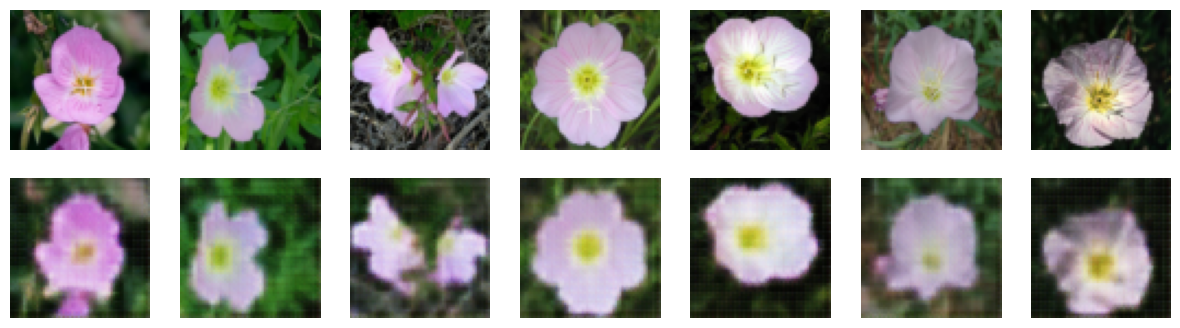

In [ ]:
# Inference
with torch.no_grad():
    for data, _ in test_loader:
        data = data.to(device)
        recon = model(data)
        break

import matplotlib.pyplot as plt
plt.figure(dpi=250)
fig, ax = plt.subplots(2, 7, figsize=(15, 4))
for i in range(7):
    ax[0, i].imshow(data[i].cpu().numpy().transpose((1, 2, 0)))
    ax[1, i].imshow(recon[i].cpu().numpy().transpose((1, 2, 0)))
    ax[0, i].axis('OFF')
    ax[1, i].axis('OFF')
plt.show()